**Topic 1:**
Description:
-	Assume a product has info with 5 properties (weight (gram), width (cm), height (cm), color, price (USD)). 
(Color :1 (Red), 2 (Blue), 3 (Green), 4 (Yellow), 5(White), 7(Purple), 8(Black), 9(Magenta), 10(Cyan))
-	A. Please input two vectors representing information of two products: A and B.  And calculate the dot product of two vectors, the angle between two vectors  
-	B.Create a random of 200 products and apply PCA to help reduce the dimensions of data from 5 to 3, or 2. Print out step by step of PCA with mean, covariance, eigenvalue, eigenvector and product vectors (after reduce)


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [2]:
A = input("Please input list of As information [weight (gram), width (cm), height (cm), color, price (USD)]:").split(',')
B = input("Please input list of Bs information [weight (gram), width (cm), height (cm), color, price (USD)]:").split(',')
A = [eval(i.strip()) for i in A]
B = [eval(i.strip()) for i in B]
print(A,'\n',B)

Please input list of As information [weight (gram), width (cm), height (cm), color, price (USD)]:3.5, 12, 5, 5, 10  
Please input list of Bs information [weight (gram), width (cm), height (cm), color, price (USD)]:2.5, 10, 4, 5, 12  
[3.5, 12, 5, 5, 10] 
 [2.5, 10, 4, 5, 12]


In [3]:
# Dot product
print('Dot product =', np.dot(A,B))

# Angle between 2 vectors
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)
def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
print('The angle =', angle_between(A,B), 'rad')

Dot product = 293.75
The angle = 0.18150249461079768 rad


In [4]:
# B
import random
import pandas as pd
def GenerateProducts(num = 200):
    weight = np.array([random.uniform(50,100) for i in range(200)])
    width = np.array([random.uniform(1,50) for i in range(200)])
    height = np.array([random.uniform(1,50) for i in range(200)])
    color = np.array([random.randint(1,10) for i in range(200)])
    price = np.array([random.uniform(1,100) for i in range(200)])
    return pd.DataFrame({'weight':weight, 'width':width, 'height':height,'color':color, 'price':price})
X = GenerateProducts()
X.head(8)

,weight,width,height,color,price
0,51.335759,13.276050,37.496032,10,5.600305
1,99.840916,14.411444,29.488927,10,96.241810
2,79.190438,28.263583,12.005303,9,30.733543
3,78.641073,4.386052,12.526872,5,4.552565
4,76.248106,10.665510,34.833261,6,60.256077
5,95.386232,29.682391,46.338600,7,60.860713
6,98.078894,16.500632,20.084360,1,40.671932
7,54.409929,40.846720,40.156066,7,81.705529


In [5]:
def PCA_DimensionReduce(X, reduce_dim = 3):
    uniform = X[['weight','width','height','color', 'price']].values
    pca = PCA(3)
    pca.fit(uniform)
    # print(pca.components_)
    # print('============')
    # print(pca.explained_variance_)
    # print('============')
    # print(pca.explained_variance_ratio_)
    return pca.transform(uniform)
X_reduce = PCA_DimensionReduce(X, reduce_dim = 3)
print('List of random 200 products with 3 properties are :')
X_reduce = pd.DataFrame(data = X_reduce, columns = ['principal component 1', 'principal component 2','principal component 3'])
X_reduce.head(5)

List of random 200 products with 3 properties are :


,principal component 1,principal component 2,principal component 3
0,-41.458919,22.197425,9.721741
1,50.057663,-23.923586,2.559181
2,-15.464965,-1.701301,-10.391653
3,-41.853741,-4.657414,-17.282397
4,13.586667,-1.878783,6.440108


In [6]:
com1 = X_reduce['principal component 1']
com2 = X_reduce['principal component 2']
com3 = X_reduce['principal component 3']
print('Mean 1 =',com1.mean())
print('Mean 2 =',com2.mean())
print('Mean 3 =',com3.mean())

Mean 1 = 2.2026824808563106e-15
Mean 2 = -8.171241461241152e-16
Mean 3 = -2.2026824808563106e-15


In [7]:
cov = np.stack((com1.values, com2.values, com3.values), axis=0)
print('Covariance matrix of 3 properties:') 
print(np.cov(cov))

Covariance matrix of 3 properties:
[[ 8.17470344e+02  1.59038431e-13 -1.96523981e-13]
 [ 1.59038431e-13  2.17725600e+02  2.57080789e-15]
 [-1.96523981e-13  2.57080789e-15  1.90598954e+02]]


In [8]:
eigval, eigvec = np.linalg.eig(np.cov(cov))
print('EigenValue:')
print(eigval)
print('=======')
print('EighenVector:')
print(eigvec)

EigenValue:
[817.47034373 190.59895393 217.72560049]
EighenVector:
[[-1.00000000e+00  3.13499681e-16  2.65176864e-16]
 [-2.65176864e-16 -2.29774104e-16 -1.00000000e+00]
 [ 3.12858329e-16  1.00000000e+00  8.17967251e-16]]


**Topic 2:**
Description:
-	Assume the loss function of an AI algorithm is y = x^3 - 2*x^2 + 1.  
-	A. Plot the function in plane and its derivative 
-	B. Using the Gradient Descent to find the x to make this function get the minimum loss. 



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

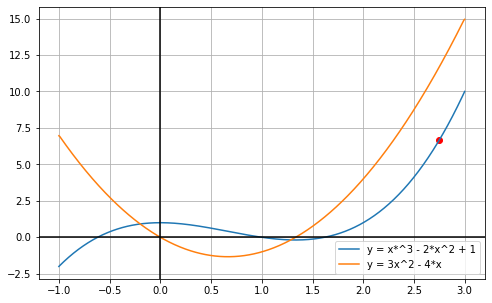

In [22]:
# Gradient descend of Loss function
# A 
# Plot function
func = lambda x : (x ** 3) - (2 * (x ** 2)) + 1
w = 2.75
x = np.linspace(-1, 3, 500)
y = [func(value) for value in x]
#Plot function's derivative
dx = x[1]-x[0]
dydx = np.gradient(y, dx)
plt.figure(figsize = (8,5))
plt.plot(x, y) 
plt.plot(x, dydx)
plt.legend(['y = x*^3 - 2*x^2 + 1','y = 3x^2 - 4*x'])
plt.scatter(w, func(w), color = 'r')
plt.plot()
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
plt.grid()
plt.show()

In [ ]:
#B
def step(x_new, x_prev, precision, l_r):
    x_list, y_list = [x_new], [func(x_new)]
    while abs(x_new - x_prev) > precision:
        dx = x_new - x_prev
        dy = func(x_new) - func(x_prev)
        x_prev = x_new
        # get the derivation of the old value of x
        d_x = - dy/dx
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (l_r * d_x)
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(func(x_new))
    x_min = x_new
    print ("Local minimum occurs at: "+ str(x_min))
    print ("Number of steps: " + str(len(x_list)))
    
    return x_list, y_list, x_min

In [12]:
x_list, y_list, x_min = step(x_new = w, x_prev = 3, precision = 0.00001, l_r = 0.05)

Local minimum occurs at: 1.3333650439953495
Number of steps: 36


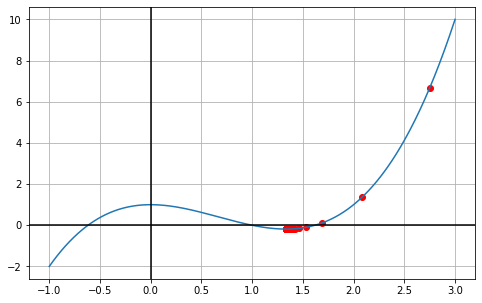

In [21]:
plt.figure(figsize = (8,5))
plt.plot(x, y) 
plt.scatter(x_list, y_list, color = 'r')
plt.plot()
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
plt.grid()
plt.show()

**Topic 3:**
Description:
-	Make use of the make_blobs from the library sklearns.datasets to create three groups/classes: 
(The following code is to make use of this function to create two groups)
-	A. Apply GaussianNB to learn on these data and plot about 2000 random points in the plane with corresponding colors to its class prediction. Print out the mean and standard deviation of each groups after learning
-	B. Given the transition table. Use Markov chain to print out after three days, what is the weather ? and what is probability ? if the today input is Rainy. 


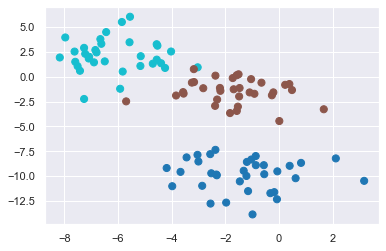

In [142]:
#A
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 3, centers = 3   , random_state = 2, cluster_std= 1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'tab10');

In [143]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [144]:
rng = np.random.RandomState(0)
Xnew = [-12, -12, -15] + [17, 25, 28] * rng.rand(2000, 3)
ynew = model.predict(Xnew)

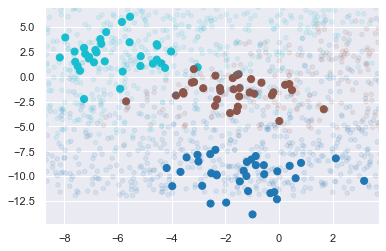

In [145]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab10')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='tab10', alpha=0.1)
plt.axis(lim);

In [146]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(3)

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [147]:
from numpy import exp, sqrt, pi 
import pandas as pd
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    #del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return pd.Series(probabilities)

In [149]:
summaries = summarize_dataset(Xnew)
for i in range(len(summaries)):
    print(f'Mean{i+1}, Std{i+1}, and Count{i+1} = ', summaries[i], ',respectively')

Mean1, Std1, and Count1 =  (-3.565092660189579, 4.965582318391452, 2000) ,respectively
Mean2, Std2, and Count2 =  (0.39108724141130635, 7.134668288935166, 2000) ,respectively
Mean3, Std3, and Count3 =  (-1.0753432662304894, 8.135441672299635, 2000) ,respectively


In [2]:
#           Sunny   Cloudy  Rainy   Snowing
# Sunny     0.6     0.3     0.1     0.0
# Cloudy    0.2     0.4     0.3     0.1
# Rainy     0.1     0.2     0.5     0.2
# Snowing   0.0     0.3     0.2     0.5

In [6]:
#B
# The statespace
import numpy as np
states = ["Sunny", "Cloudy", "Rainy", "Snowing"]

# Possible sequences of events
transitionName = [["SS","SC","SR","SO"],["CS","CC","CR","CO"],["RS","RC","RR","R0"],["OS","OC","OR","OO"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.6,0.3,0.1,0.0],[0.2,0.4,0.3,0.1],[0.1,0.2,0.5,0.2],[0.0,0.3,0.2,0.5]]

print(transitionMatrix)

if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

[[0.6, 0.3, 0.1, 0.0], [0.2, 0.4, 0.3, 0.1], [0.1, 0.2, 0.5, 0.2], [0.0, 0.3, 0.2, 0.5]]
All is gonna be okay, you should move on!! ;)


In [7]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(activityToday, days):
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sunny":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.6
                activityList.append("Sunny")
                pass
            elif change == "SC":
                prob = prob * 0.3
                activityToday = "Cloudy"
                activityList.append("Cloudy")
            elif change == "SR":
                prob = prob * 0.1
                activityToday = "Rainy"
                activityList.append("Rainy")
            else:
                prob = prob * 0
                activityToday = "Snowing"
                activityList.append("Snowing")
        elif activityToday == "Cloudy":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "CC":
                prob = prob * 0.4
                activityList.append("Cloudy")
                pass
            elif change == "CS":
                prob = prob * 0.2
                activityToday = "Sunny"
                activityList.append("Sunny")
            elif change == "CR":
                prob = prob * 0.3
                activityToday = "Rainy"
                activityList.append("Rainy")
            else:
                prob = prob * 0.1
                activityToday = "Snowing"
                activityList.append("Snowing")
        elif activityToday == "Rainy":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Rainy")
                pass
            elif change == "RS":
                prob = prob * 0.1
                activityToday = "Sunny"
                activityList.append("Sunny")
            elif change == "RC":
                prob = prob * 0.2
                activityToday = "Cloudy"
                activityList.append("Cloudy")
            else:
                prob = prob * 0.2
                activityToday = "Snowing"
                activityList.append("Snowing")
        elif activityToday == "Snowing":
            change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
            if change == "OO":
                prob = prob * 0.5
                activityList.append("Snowing")
                pass
            elif change == "OS":
                prob = prob * 0.0
                activityToday = "Sunny"
                activityList.append("Sunny")
            elif change == "OC":
                prob = prob * 0.3
                activityToday = "Cloudy"
                activityList.append("Cloudy")
            else:
                prob = prob * 0.2
                activityToday = "Snowing"
                activityList.append("Snowing")
        i += 1  
    return activityList, prob

In [45]:
# Function that forecasts the possible state for the next days
days = 3
activityToday = "Rainy"
print("Start state: " + activityToday)
activityList, prob = activity_forecast(activityToday, days)

print("Possible states: " + str(activityList))
print("End state after "+ str(days) + " days: " + activityList[-1])
print("Probability of the possible sequence of states: " + str(prob))

Start state: Rainy
Possible states: ['Rainy', 'Rainy', 'Snowing', 'Snowing']
End state after 3 days: Snowing
Probability of the possible sequence of states: 0.05


In [37]:
# To save every activityList
days = 3
activityToday = "Rainy"
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
    activityList, prob = activity_forecast(activityToday, days)
    list_activity.append(activityList)

# Check out all the `activityList` we collected    
print(list_activity[:5])

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    endday='Cloudy'
    if(smaller_list[-1] == endday):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print(f"The probability of starting at state: {activityToday} and ending at state: {endday}= " + str(percentage) + "%")

[['Rainy', 'Rainy', 'Rainy', 'Rainy'], ['Rainy', 'Cloudy', 'Sunny', 'Sunny'], ['Rainy', 'Sunny', 'Sunny', 'Sunny'], ['Rainy', 'Snowing', 'Snowing', 'Cloudy'], ['Rainy', 'Rainy', 'Rainy', 'Cloudy']]
The probability of starting at state: Rainy and ending at state: Cloudy= 29.42%
